# table of contents:
- [Data cleaning](#Data_cleaning)
- [EDA](#EDA)
- [conclusions](#conclusions)

# Getting started and Knowing the data

**scenario:**
- our agency is running social media ad campaign including 3 main promotions and many facebook ads, we would like to know our audience better to know the best category to target, and which campaign is doing the best.
- to do that we will perform some EDA on the data to know our audience and to choose the best campaign.

the data is taken from kaggle download it here: https://www.kaggle.com/datasets/loveall/clicks-conversion-tracking?datasetId=2678&searchQuery=regression

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statsmodels.stats
import statsmodels.api as sm

In [2]:
# reading data
df=pd.read_csv('KAG_conversion_data.csv')
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
df.shape

(1143, 11)


The data used in this project is from an anonymous organisation’s social media ad campaign. The data file can be downloaded from here. The file conversion_data.csv contains 1143 observations in 11 variables. Below are the descriptions of the variables.

1.) ad_id: a unique ID for each ad.

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whom the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

Acknowledgements
Thanks to the Anonymous data depositor

Inspiration
Social Media Ad Campaign marketing is a leading source of Sales Conversion and i have made this data available for the benefit of Businesses using Google Adwords to track Conversions

# Data_cleaning

In [4]:
# checking the types of data in our columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
# checking for any null values
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [6]:
# checking for any duplicated rows
df.duplicated().sum()

0

seems like our data is clean and has no NA values or duplicated rows

# EDA

In [7]:
# checking for the number of unique values in each column in our data this helps us to make comparisons between the values
df.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

In [8]:
# the four most important variables in our data are the campaign _id, gender, age and interest
print(df.xyz_campaign_id.unique())
print(df.age.unique())
print(df.gender.unique())
print(df.interest.unique())

[ 916  936 1178]
['30-34' '35-39' '40-44' '45-49']
['M' 'F']
[ 15  16  20  28  29  27  31   7  30  24  21  32  18  63  65  25  10  19
  26  36  23  64  22   2  66 100 101 102 103 105 107 110 111 112 113 108
 109 114 104 106]


In [9]:
# we better change the category names in our data to identify it better
df['xyz_campaign_id'] = df['xyz_campaign_id'].replace(df.xyz_campaign_id.unique(), ['x', 'y', 'z'])
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,x,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,x,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,x,103920,30-34,M,20,693,0,0.00,1,0
3,708815,x,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,x,103928,30-34,M,28,4133,1,1.29,1,1


In [10]:
# creating a list from 1 to 40 to change the values in the interest column
interest_groups = np.arange(1,41).tolist()
print(interest_groups)  

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


In [11]:
df.sort_values(by=['interest'], inplace=True)
df['interest'] = df['interest'].replace(df.interest.unique(), interest_groups)
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
896,1121876,z,144669,30-34,F,1,82455,15,22.050000,1,0
610,1121275,z,144569,30-34,M,1,118522,14,26.820000,2,1
609,1121274,z,144569,30-34,M,1,63785,7,11.800000,6,2
608,1121273,z,144569,30-34,M,1,9370,0,0.000000,1,1
690,1121421,z,144594,35-39,M,1,233404,43,70.410001,2,1


In [12]:
df.sort_index(inplace=True)
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,x,103916,30-34,M,4,7350,1,1.43,2,1
1,708749,x,103917,30-34,M,5,17861,2,1.82,2,0
2,708771,x,103920,30-34,M,8,693,0,0.00,1,0
3,708815,x,103928,30-34,M,16,4259,1,1.25,1,0
4,708818,x,103928,30-34,M,16,4133,1,1.29,1,1


In [13]:
print(df.xyz_campaign_id.unique())
print(df.age.unique())
print(df.gender.unique())
print(df.interest.unique())

['x' 'y' 'z']
['30-34' '35-39' '40-44' '45-49']
['M' 'F']
[ 4  5  8 16 17 15 19  2 18 12  9 20  6 22 24 13  3  7 14 21 11 23 10  1
 25 26 27 28 29 31 33 36 37 38 39 34 35 40 30 32]


we want to track the following:
- click through rate. ctr
- conversion rate on impressions. cvr
- customer aquisition cost. cac

In [14]:
df.set_index('ad_id', inplace=True)
df.head()

,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
ad_id,,,,,,,,,,
708746,x,103916,30-34,M,4,7350,1,1.43,2,1
708749,x,103917,30-34,M,5,17861,2,1.82,2,0
708771,x,103920,30-34,M,8,693,0,0.00,1,0
708815,x,103928,30-34,M,16,4259,1,1.25,1,0
708818,x,103928,30-34,M,16,4133,1,1.29,1,1


In [15]:
df.describe()

,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,133783.989501,13.338583,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,20500.308622,8.976422,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,103916.000000,1.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,115716.000000,5.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,144549.000000,13.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,144657.500000,19.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,179982.000000,40.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [16]:
print(len(df.query('gender=="M"')))
print(len(df.query('gender=="F"')))

592
551


In [17]:
df_gender=df.groupby('gender').agg({'Impressions': ['sum'], 'Clicks': ['sum'], 'Spent': ['sum'], 'Approved_Conversion': ['sum']})
df_gender['ctr'] = df_gender[('Clicks',  'sum')]/df_gender[('Impressions',  'sum')]*100
df_gender['cvr'] = df_gender[('Approved_Conversion',  'sum')]/df_gender[('Clicks',  'sum')]*100
df_gender['cac'] = df_gender[('Spent',  'sum')]/df_gender[('Approved_Conversion',  'sum')]
df_gender

,Impressions,Clicks,Spent,Approved_Conversion,ctr,cvr,cac
,sum,sum,sum,sum,,,
gender,,,,,,,
F,114862847,23878,34502.619963,495,0.020788,2.073038,69.702263
M,98571981,14287,24202.609995,584,0.014494,4.087632,41.442825


In [18]:
df_gender.reset_index(inplace=True)
df_gender.columns = df_gender.columns.get_level_values(0)
df_gender.drop(['Impressions', 'Clicks', 'Spent', 'Approved_Conversion'], axis=1, inplace=True)
df_gender

,gender,ctr,cvr,cac
0,F,0.020788,2.073038,69.702263
1,M,0.014494,4.087632,41.442825


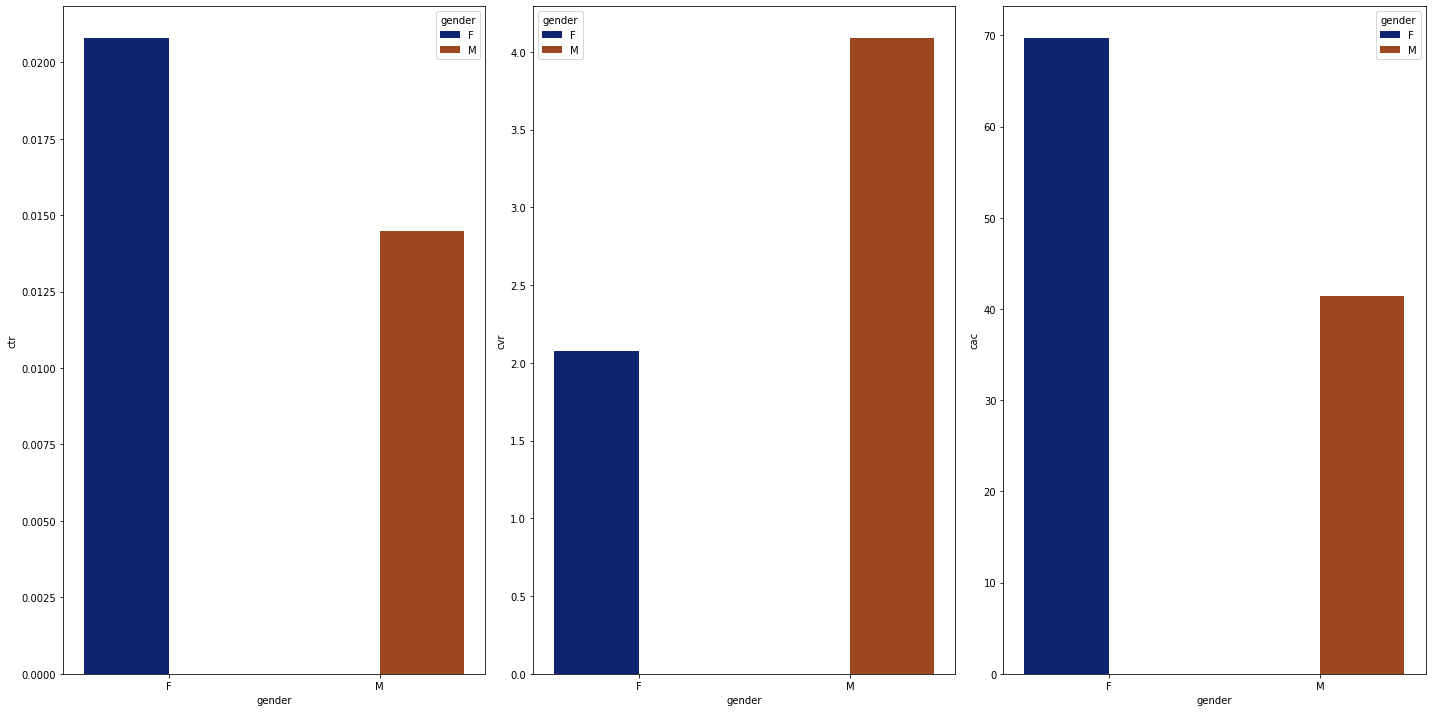

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(20,10))
sns.barplot(data=df_gender, x="gender", y="ctr", hue="gender", palette="dark", ax=axes[0])
sns.barplot(data=df_gender, x="gender", y="cvr", hue="gender", palette="dark", ax=axes[1])
sns.barplot(data=df_gender, x="gender", y="cac", hue="gender", palette="dark", ax=axes[2])
fig.tight_layout()

Female customers have better CTR but with a slight difference (0.005) on the other hand the male customers have higher CVR (almost double the female customers) and a better CAC (almost half the female).
- this indicates that we have better chance with the male customers

In [20]:
print(len(df.query('age=="30-34"')))
print(len(df.query('age=="35-39"')))
print(len(df.query('age=="40-44"')))
print(len(df.query('age=="45-49"')))

426
248
210
259


In [21]:
df_age=df.groupby('age').agg({'Impressions': ['sum'], 'Clicks': ['sum'], 'Spent': ['sum'], 'Approved_Conversion': ['sum']})
df_age['ctr'] = df_age[('Clicks',  'sum')]/df_age[('Impressions',  'sum')]*100
df_age['cvr'] = df_age[('Approved_Conversion',  'sum')]/df_age[('Clicks',  'sum')]*100
df_age['cac'] = df_age[('Spent',  'sum')]/df_age[('Approved_Conversion',  'sum')]
df_age

,Impressions,Clicks,Spent,Approved_Conversion,ctr,cvr,cac
,sum,sum,sum,sum,,,
age,,,,,,,
30-34,67993019,9483,15252.399986,494,0.013947,5.209322,30.875304
35-39,42104644,7094,11112.429994,207,0.016848,2.917959,53.683237
40-44,39604307,7736,11589.729981,170,0.019533,2.197518,68.174882
45-49,63732858,13852,20750.669997,208,0.021734,1.501588,99.762837


In [22]:
df_age.reset_index(inplace=True)
df_age.columns = df_age.columns.get_level_values(0)
df_age.drop(['Impressions', 'Clicks', 'Spent', 'Approved_Conversion'], axis=1, inplace=True)
df_age

,age,ctr,cvr,cac
0,30-34,0.013947,5.209322,30.875304
1,35-39,0.016848,2.917959,53.683237
2,40-44,0.019533,2.197518,68.174882
3,45-49,0.021734,1.501588,99.762837


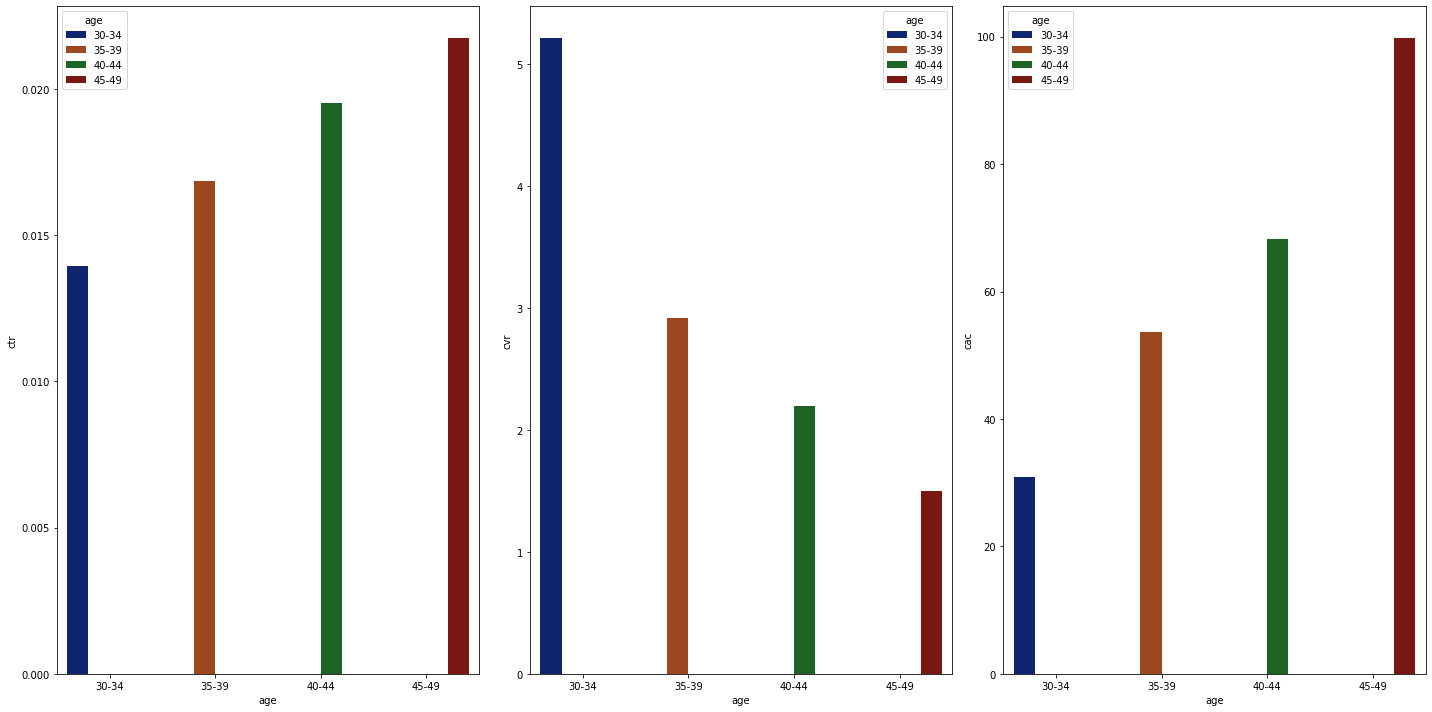

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(20,10))
sns.barplot(data=df_age, x="age", y="ctr", hue="age", palette="dark", ax=axes[0])
sns.barplot(data=df_age, x="age", y="cvr", hue="age", palette="dark", ax=axes[1])
sns.barplot(data=df_age, x="age", y="cac", hue="age", palette="dark", ax=axes[2])
fig.tight_layout()

- 30-34 year old customers have lower CTR than other age groups but they have the highest CVR and the lowest CAC which means they're more preferable to purchase our product even if they've the lowest ctr.
- although the 45-49 group has the best CTR but they're also the lowest in CVR and the highest in CAC which means they click the ad but don't purchase a lot, we can do better if we just focused on one of the other two groups (35-39 or 40-44) as they have a higher CTR than the 30-34 group and they're close to each other on the other two KPIs, the most preferable one of them is the 35-39 group as it's better in two metrics than the other.
- the two best groups to focus on are 30-34 and 35-39.

In [24]:
df_interest=df.groupby('interest').agg({'Impressions': ['sum'], 'Clicks': ['sum'], 'Spent': ['sum'], 'Approved_Conversion': ['sum']})
df_interest['ctr'] = df_interest[('Clicks',  'sum')]/df_interest[('Impressions',  'sum')]*100
df_interest['cvr'] = df_interest[('Approved_Conversion',  'sum')]/df_interest[('Clicks',  'sum')]*100
df_interest['cac'] = df_interest[('Spent',  'sum')]/df_interest[('Approved_Conversion',  'sum')]
df_interest

,Impressions,Clicks,Spent,Approved_Conversion,ctr,cvr,cac
,sum,sum,sum,sum,,,
interest,,,,,,,
1,1727646,311,503.450005,19,0.018001,6.109325,26.497369
2,2612839,410,648.929999,19,0.015692,4.634146,34.154210
3,17989844,3317,5086.379995,91,0.018438,2.743443,55.894286
4,10745856,1609,2597.259995,63,0.014973,3.915475,41.226349
5,31809524,5144,8084.909990,141,0.016171,2.741058,57.339787
6,8646488,1524,2425.070001,33,0.017626,2.165354,73.486970
7,6083217,1188,1940.359993,33,0.019529,2.777778,58.798788
8,6899907,1234,1960.770001,47,0.017884,3.808752,41.718511


In [25]:
df_interest.reset_index(inplace=True)
df_interest.columns = df_interest.columns.get_level_values(0)
df_interest.drop(['Impressions', 'Clicks', 'Spent', 'Approved_Conversion'], axis=1, inplace=True)
df_interest

,interest,ctr,cvr,cac
0,1,0.018001,6.109325,26.497369
1,2,0.015692,4.634146,34.154210
2,3,0.018438,2.743443,55.894286
3,4,0.014973,3.915475,41.226349
4,5,0.016171,2.741058,57.339787
5,6,0.017626,2.165354,73.486970
6,7,0.019529,2.777778,58.798788
7,8,0.017884,3.808752,41.718511
8,9,0.018071,5.273438,30.526296
9,10,0.018081,1.673640,86.655000


In [26]:
df_interest.describe()

,interest,ctr,cvr,cac
count,40.000000,40.000000,40.000000,40.000000
mean,20.500000,0.017678,3.222348,57.841869
std,11.690452,0.002353,1.640284,24.305031
min,1.000000,0.012728,1.324503,18.693750
25%,10.750000,0.016051,2.057328,37.932102
50%,20.500000,0.017899,2.838164,56.097571
75%,30.250000,0.019256,3.932082,74.197668
max,40.000000,0.022861,8.205128,107.966665


In [27]:
df_interest_filtered = df_interest.query('ctr >= 0.017678 & cvr >= 3.222348 & cac <= 57.841869')
df_interest_filtered

,interest,ctr,cvr,cac
0,1,0.018001,6.109325,26.497369
7,8,0.017884,3.808752,41.718511
8,9,0.018071,5.273438,30.526296
11,12,0.018566,3.579952,44.670667
18,19,0.018134,8.205128,18.693750
23,24,0.021409,5.107527,28.526842
26,27,0.017700,4.770992,30.307600


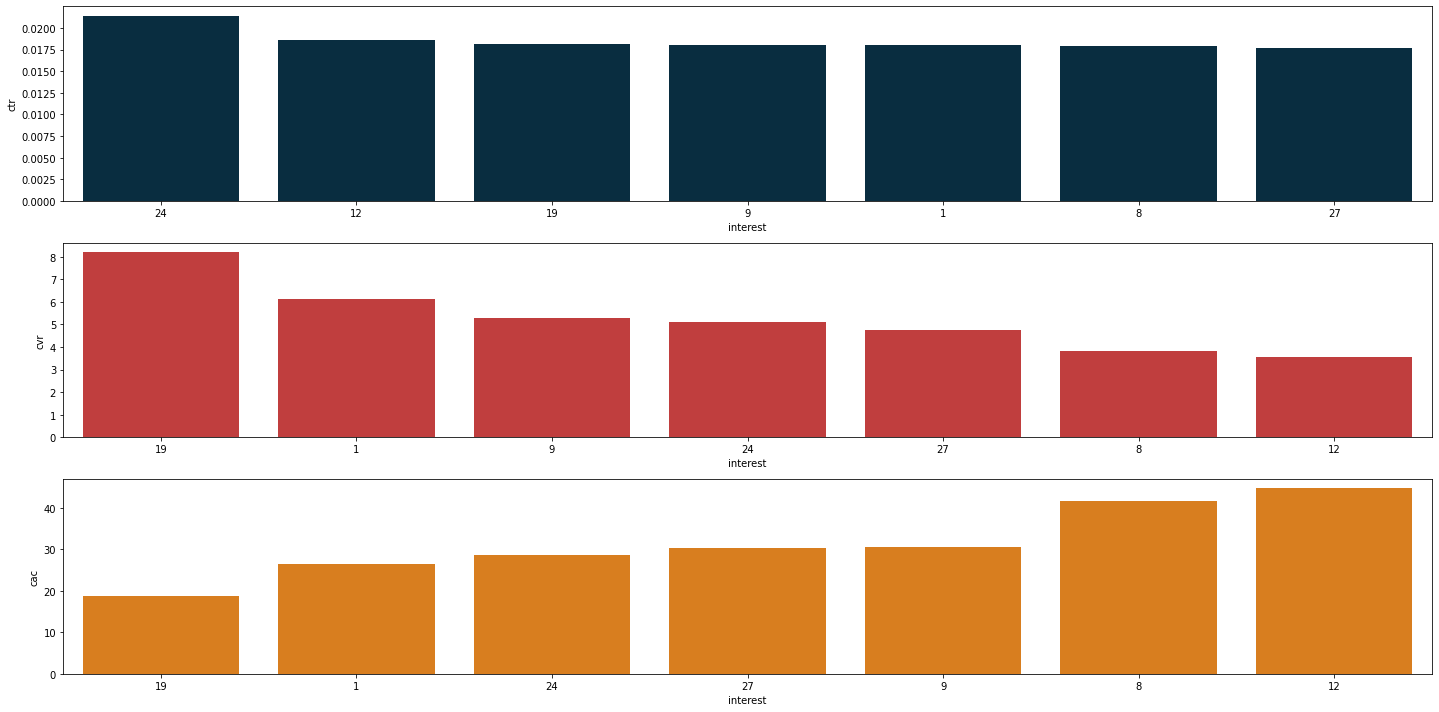

In [28]:
my_blue = '#003049'
my_red = '#d62828'
my_orange='#f77f00'
fig, axes = plt.subplots(3, 1, figsize=(20,10))
sns.barplot(x='interest', y="ctr", data=df_interest_filtered, order=df_interest_filtered.sort_values('ctr', ascending=False).interest, color=my_blue, ax=axes[0])
sns.barplot(x='interest', y="cvr", data=df_interest_filtered, order=df_interest_filtered.sort_values('cvr', ascending=False).interest, color=my_red, ax=axes[1])
sns.barplot(x='interest', y="cac", data=df_interest_filtered, order=df_interest_filtered.sort_values('cac', ascending=True).interest, color=my_orange, ax=axes[2])
fig.tight_layout()

- The best interest groups in CTR is 24 and it's the only one in this group with more than 0.02% CTR, all the other groups range around 0.018%.
- In the CVR comparison the difference occurs clearer, as the 19 group have more than 8% CVR and the second group is group 1 with about 6% CVR, group 24 which has the highest CTR and group 9 have more than 5% CVR.
- And the results are very similar on the CAC comparison as groups (19, 1 and 24) have the first 3 places with a big adventage for group 19 as it's the only one below 20$ CAC.
- In conclusion the best group to focus on is group 19 as it's the best on two KPIs and also it'll be good to focus on groups 24 and 1.

In [29]:
print(len(df.query('xyz_campaign_id=="x"')))
print(len(df.query('xyz_campaign_id=="y"')))
print(len(df.query('xyz_campaign_id=="z"')))

54
464
625


In [30]:
df_campaign=df.groupby('xyz_campaign_id').agg({'Impressions': ['sum'], 'Clicks': ['sum'], 'Spent': ['sum'], 'Approved_Conversion': ['sum']})
df_campaign['ctr'] = df_campaign[('Clicks',  'sum')]/df_campaign[('Impressions',  'sum')]*100
df_campaign['cvr'] = df_campaign[('Approved_Conversion',  'sum')]/df_campaign[('Clicks',  'sum')]*100
df_campaign['cac'] = df_campaign[('Spent',  'sum')]/df_campaign[('Approved_Conversion',  'sum')]
df_campaign

,Impressions,Clicks,Spent,Approved_Conversion,ctr,cvr,cac
,sum,sum,sum,sum,,,
xyz_campaign_id,,,,,,,
x,482925,113,149.710001,24,0.023399,21.238938,6.237917
y,8128187,1984,2893.369999,183,0.024409,9.223790,15.810765
z,204823716,36068,55662.149959,872,0.017609,2.417656,63.832741


In [31]:
df_campaign.reset_index(inplace=True)
df_campaign.columns = df_campaign.columns.get_level_values(0)
df_campaign.drop(['Impressions', 'Clicks', 'Spent', 'Approved_Conversion'], axis=1, inplace=True)
df_campaign

,xyz_campaign_id,ctr,cvr,cac
0,x,0.023399,21.238938,6.237917
1,y,0.024409,9.223790,15.810765
2,z,0.017609,2.417656,63.832741


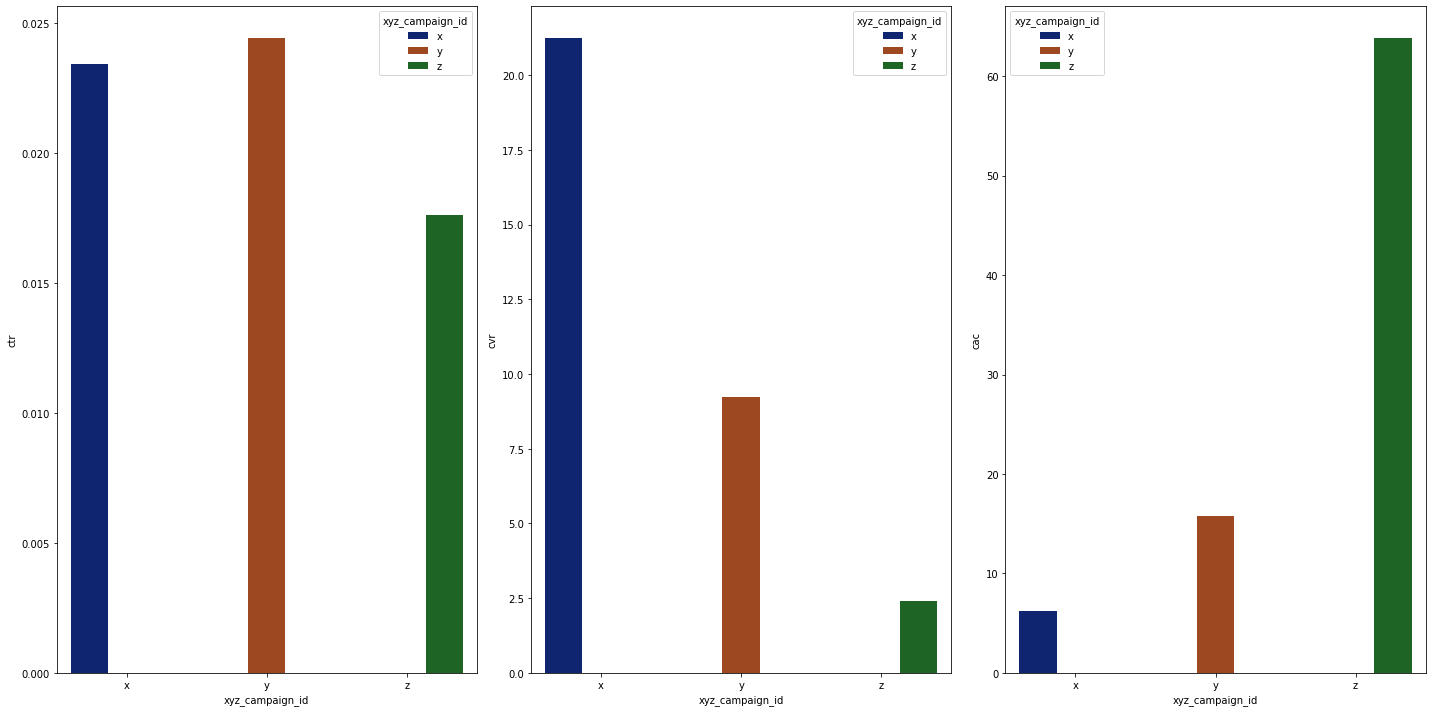

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(20,10))
sns.barplot(data=df_campaign, x="xyz_campaign_id", y="ctr", hue="xyz_campaign_id", palette="dark", ax=axes[0])
sns.barplot(data=df_campaign, x="xyz_campaign_id", y="cvr", hue="xyz_campaign_id", palette="dark", ax=axes[1])
sns.barplot(data=df_campaign, x="xyz_campaign_id", y="cac", hue="xyz_campaign_id", palette="dark", ax=axes[2])
fig.tight_layout()

# conclusions

- the female customers are more likely to click on the ad after seeing it but the male customers are more likely to buy the product after clicking on the ad and have less aquiring cost.
- the two best age groups to focus on are 30-34 and 35-39 as they have the least CAC and they have higher CVR than the other two groups, the top group in age overall is the 30-34 group.
- the best group to focus on is group 19 as it's the best on two KPIs and also it'll be good to focus on groups 24 and 1.
- campaign z has the most number of ads but it has the worst performance of the 3 campaigns, and campaign x is the best of the three in the 3 KPIs as they're all very similar in the CTR rate, but it's the best one in the CVR and CAC then campaign y.

**we suggest that the company runs campaign y as it's the second best campaign and has a big number of ads and stop campaign z to spend more on campaign x and keep tracking it as it's possibly the best campaign.**
**we also suggest to target the age groups between 30 and 39 as they've greater potential to purchase the product and also focus on the interest groups 19, 24 and 1 and focus more on the male customers.** </br>
**these suggestions should minimize our cost to aqcuire more clients and maximize out profit.**